In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
width, height = 20, 20
plt.rcParams['figure.figsize'] = [width, height]
plt.rcParams['font.size'] = 30
plt.rcParams['lines.linewidth'] = 4
plt.rcParamsDefault['lines.markersize'] = 14

In [2]:
data = pd.read_csv("Termopar_tipoj.csv")
data

,display,temperatura_sistema
0,1.22,25.0
1,1.71,35.5
2,2.02,42.0
3,2.29,46.5
4,2.44,49.0
5,2.78,54.0
6,2.88,56.0
7,3.03,59.0
8,3.30,64.0
9,3.53,68.5


In [3]:
t1 = np.array([0 for i in range(len(data))])
dv = lambda dt, S: S*dt

In [4]:
X = lambda t1, t2: (t2 - t1)
Y = lambda dv: dv

In [5]:
xv = X(t1, data['temperatura_sistema'])
yv = Y(data['display'])

In [6]:
import statsmodels.api as sm
ols = sm.OLS(yv, xv)
ols_result = ols.fit()
print(ols_result.summary())

/home/gabriel/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                display   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.011e+04
Date:                Thu, 01 Nov 2018   Prob (F-statistic):           2.31e-16
Time:                        15:06:58   Log-Likelihood:                 11.084
No. Observations:                  11   AIC:                            -20.17
Df Residuals:                      10   BIC:                            -19.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
temperatura_sistema     0.0513    

/home/gabriel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


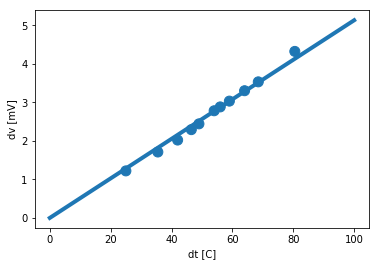

In [8]:
a = ols_result.params
ua = ols_result.HC1_se

testx = np.linspace(0,100, 10).reshape(10, -1)
plt.xlabel('dt [C]')
plt.ylabel('dv [mV]')
plt.scatter(xv,yv, s=[100]*4)
plt.plot(testx, testx*a[0])